<a href="https://colab.research.google.com/github/Ireneyou33/Model-Comparison-and-Forecasting-on-COVID-19/blob/master/Forecasting_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout
import datetime as dt
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras import Sequential
from keras.models import load_model
from keras.models import model_from_json
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
import json
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_conf_new=pd.read_csv("/content/drive/My Drive/ST494/project/Conf_new.csv")
df_conf_new

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861,862,877,880,880,880,884
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541,576,607,638,687,705,749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186400,6.613100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,632,639,659,661,662,671,683,688,693,698,698,702,707,710,711,712,713,713,713,714,715,717,719,719,720,721,724,724,726,727,727,729,732,732,737,740,741,743,746,746
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,591,632,705,728,844,885,902,909,919,922,941,967,992,1015,1076,1089,1103,1118,1128,1158,1190,1221,1240,1248,1265,1284,1297,1318,1356,1380,1389,1465,1498,1516,1526,1552,1576,1581,1606,1619
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,162,163,176,176,176,197,197,210,210,247,247,247,265,265,272,272,272,272,272,303,303,303,309,309,311,311,311,313,314,314,317,317,317,321,321,328,328,328,334,334
264,NaN,Tajikistan,38.861000,71.276100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4834,4902,4971,5035,5097,5160,5221,5279,5338,5399,5457,5513,5567,5630,5691,5747,5799,5849,5900,5900,6005,6058,6058,6159,6213,6262,6315,6364,6410,6457,6506,6552,6596,6643,6695,6741,6786,6834,6878,6921


In [ ]:
date=df_conf_new.columns[4:]
for i in range(len(date)):
    date.values[i]=pd.to_datetime(date.values[i], format="%m/%d/%y")
print(len(date))

idx = int(len(date)*0.8)
print(idx)

181
144


In [ ]:
start_date=date[0]

## NN Forecast Comparison

### World Class

In [ ]:
df_worldclass=worldclass_dataframe(df_conf_new)
df_worldclass=df_worldclass.iloc[:, :-12]

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
forecast_days = 10
world_forecast10_w1=pd.read_csv("worldNN_forecast10_w1.csv")
world_forecast10_w1.columns = pd.to_datetime(world_forecast10_w1.columns)

pandas._libs.tslibs.timestamps.Timestamp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  import sys


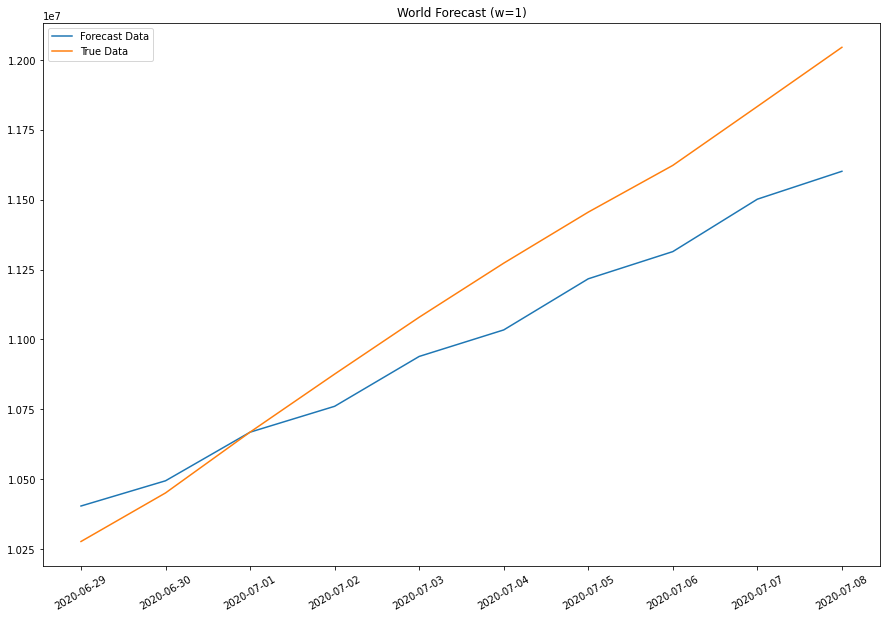

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(world_forecast10_w1.iloc[1, -forecast_days:])
plt.plot(df_worldclass.iloc[0, -forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Forecast Data", "True Data"])
plt.title("World Forecast (w=1)")
plt.show()

In [ ]:
rmse = mean_squared_error(df_worldclass.iloc[0, -forecast_days:], world_forecast10_w1.iloc[1, -forecast_days:] , squared=False)
print("RMSE of World NN 10 days forcasting: {}".format(rmse))

RMSE of World NN 10 days forcasting: 238220.62453847274


In [ ]:
world_forecast10_w5=pd.read_csv("worldNN_forecast10_w5.csv")
world_forecast10_w5.columns = pd.to_datetime(world_forecast10_w5.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


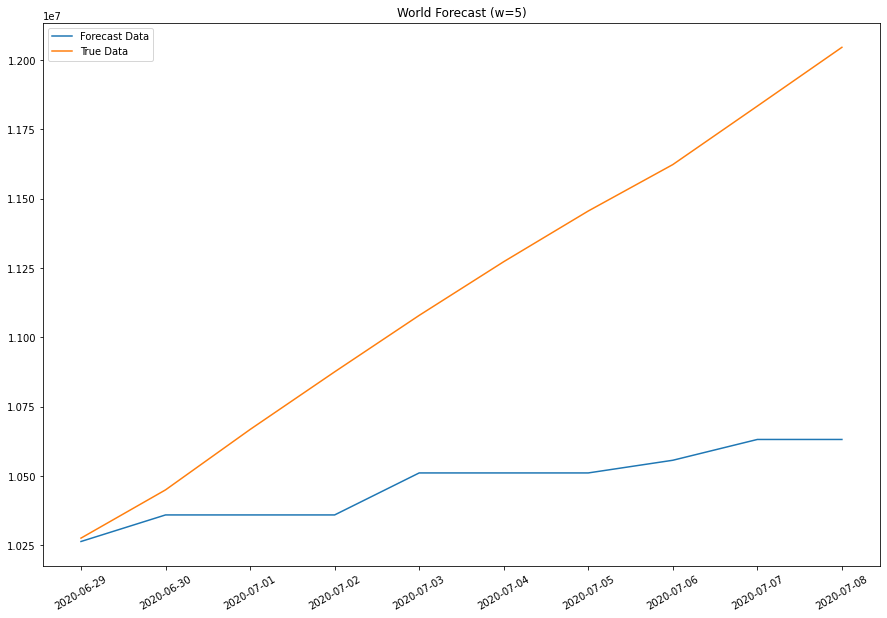

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(world_forecast10_w5.iloc[1, -forecast_days:])
plt.plot(df_worldclass.iloc[0, -forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Forecast Data", "True Data"])
plt.title("World Forecast (w=5)")
plt.show()

In [ ]:
rmse = mean_squared_error(df_worldclass.iloc[0, -forecast_days:], world_forecast10_w5.iloc[1, -forecast_days:] , squared=False)
print("RMSE of World NN 10 days forcasting: {}".format(rmse))

RMSE of World NN 10 days forcasting: 820999.1322839507


W = 1 better

### China

In [ ]:
df_china, _, _ = sum_regioncase(df_conf_new, "China", region_level="county")
df_china=df_china.iloc[:, :-12]

In [ ]:
forecast_days = 10
chinaNN_forecast10_w1=pd.read_csv("ChinaNN_forecast10_w1.csv")
chinaNN_forecast10_w1.columns = pd.to_datetime(chinaNN_forecast10_w1.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


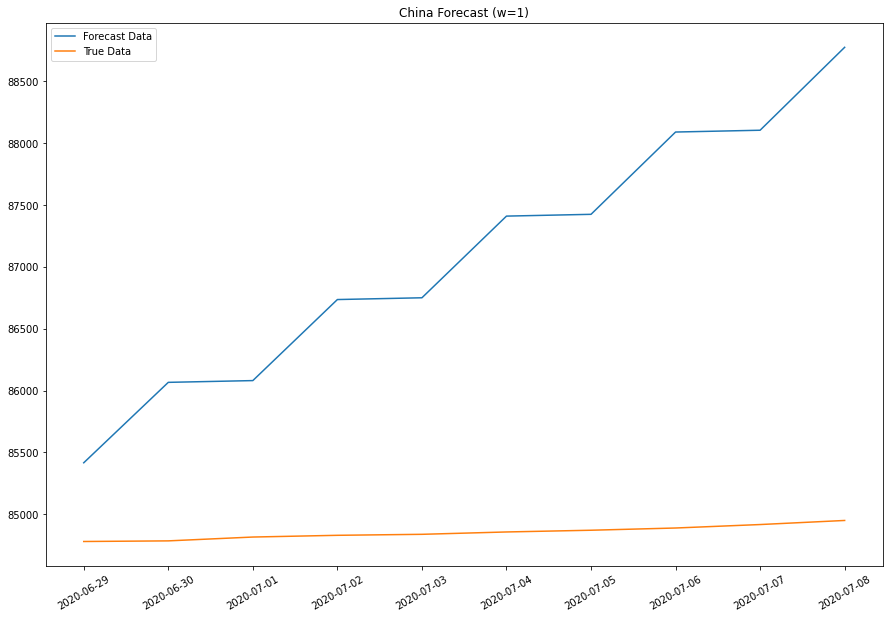

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(chinaNN_forecast10_w1.iloc[1, -forecast_days:])
plt.plot(df_china.iloc[0, -forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Forecast Data", "True Data"])
plt.title("China Forecast (w=1)")
plt.show()

In [ ]:
rmse = mean_squared_error(df_china.iloc[0, -forecast_days:], chinaNN_forecast10_w1.iloc[1, -forecast_days:] , squared=False)
print("RMSE of China NN 10 days forcasting: {}".format(rmse))

RMSE of China NN 10 days forcasting: 2428.77350832774


### Canada

In [ ]:
df_canada, _, _ = sum_regioncase(df_conf_new, "Canada", region_level="county")
df_canada = df_canada.iloc[:, :-12]

In [ ]:
forecast_days = 10
canadaNN_forecast10_w1=pd.read_csv("CanadaNN_forecast10_w1.csv")
canadaNN_forecast10_w1.columns = pd.to_datetime(canadaNN_forecast10_w1.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


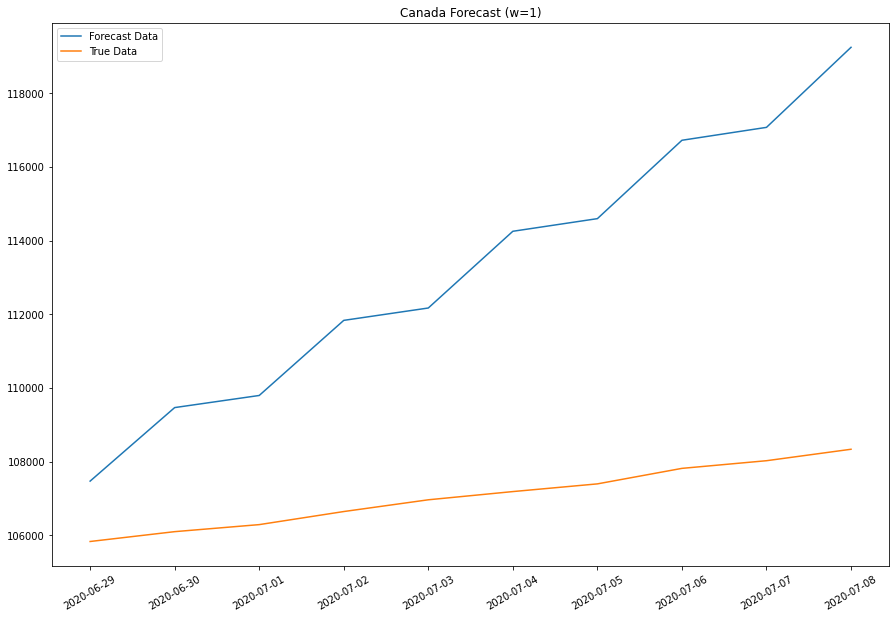

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(canadaNN_forecast10_w1.iloc[1, -forecast_days:])
plt.plot(df_canada.iloc[0, -forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Forecast Data", "True Data"])
plt.title("Canada Forecast (w=1)")
plt.show()

In [ ]:
rmse = mean_squared_error(df_canada.iloc[0, -forecast_days:], canadaNN_forecast10_w1.iloc[1, -forecast_days:] , squared=False)
print("RMSE of Canada NN 10 days forcasting: {}".format(rmse))

RMSE of Canada NN 10 days forcasting: 6800.064028381041


In [ ]:
canadaNN_forecast10_w5=pd.read_csv("CanadaNN_forecast10_w5.csv")
canadaNN_forecast10_w5.columns = pd.to_datetime(canadaNN_forecast10_w5.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


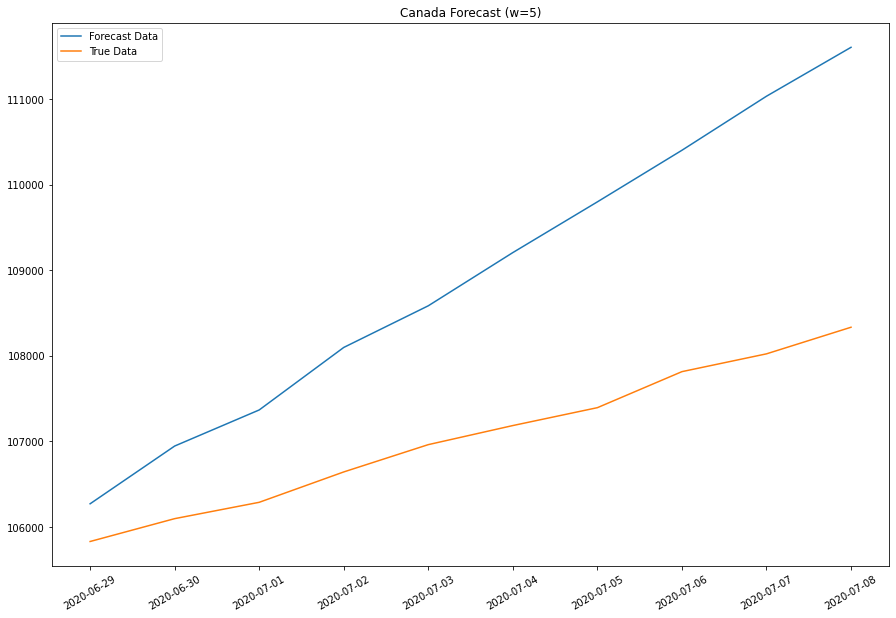

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(canadaNN_forecast10_w5.iloc[1, -forecast_days:])
plt.plot(df_canada.iloc[0, -forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Forecast Data", "True Data"])
plt.title("Canada Forecast (w=5)")
plt.show()

In [ ]:
rmse = mean_squared_error(df_canada.iloc[0, -forecast_days:], canadaNN_forecast10_w5.iloc[1, -forecast_days:] , squared=False)
print("RMSE of Canada NN 10 days forcasting: {}".format(rmse))

RMSE of Canada NN 10 days forcasting: 2077.574602027505


w = 5 is better

### Italy

In [ ]:
df_italy, _, _ = sum_regioncase(df_conf_new, "Italy", region_level="county")
df_italy = df_italy.iloc[:, :-12]

In [ ]:
forecast_days = 10
italyNN_forecast10_w1=pd.read_csv("ItalyNN_forecast10_w1.csv")
italyNN_forecast10_w1.columns = pd.to_datetime(italyNN_forecast10_w1.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


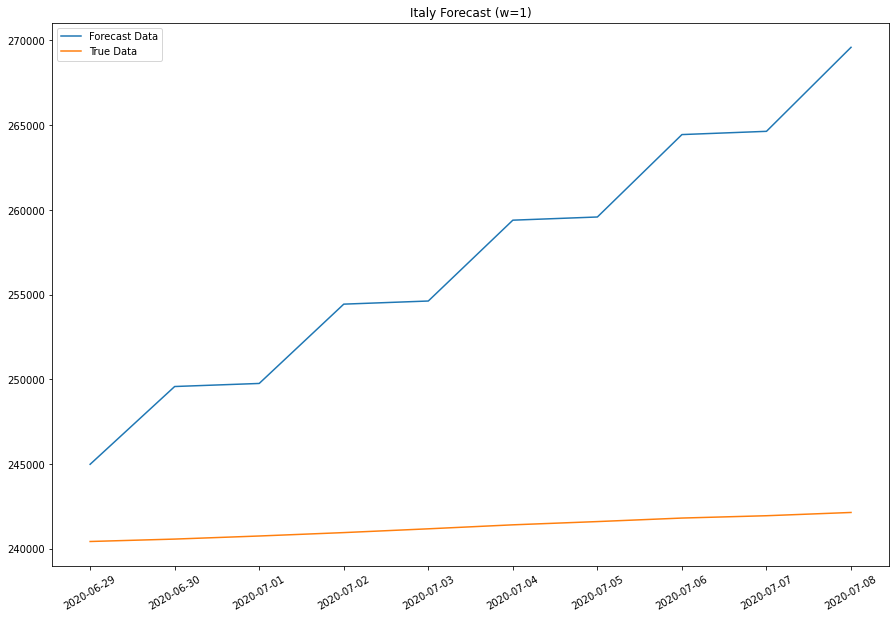

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(italyNN_forecast10_w1.iloc[1, -forecast_days:])
plt.plot(df_italy.iloc[0, -forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Forecast Data", "True Data"])
plt.title("Italy Forecast (w=1)")
plt.show()

In [ ]:
rmse = mean_squared_error(df_italy.iloc[0, -forecast_days:], italyNN_forecast10_w1.iloc[1, -forecast_days:] , squared=False)
print("RMSE of Canada NN 10 days forcasting: {}".format(rmse))

RMSE of Canada NN 10 days forcasting: 17235.983251238886


In [ ]:
italyNN_forecast10_w5=pd.read_csv("ItalyNN_forecast10_w5.csv")
italyNN_forecast10_w5.columns = pd.to_datetime(italyNN_forecast10_w5.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


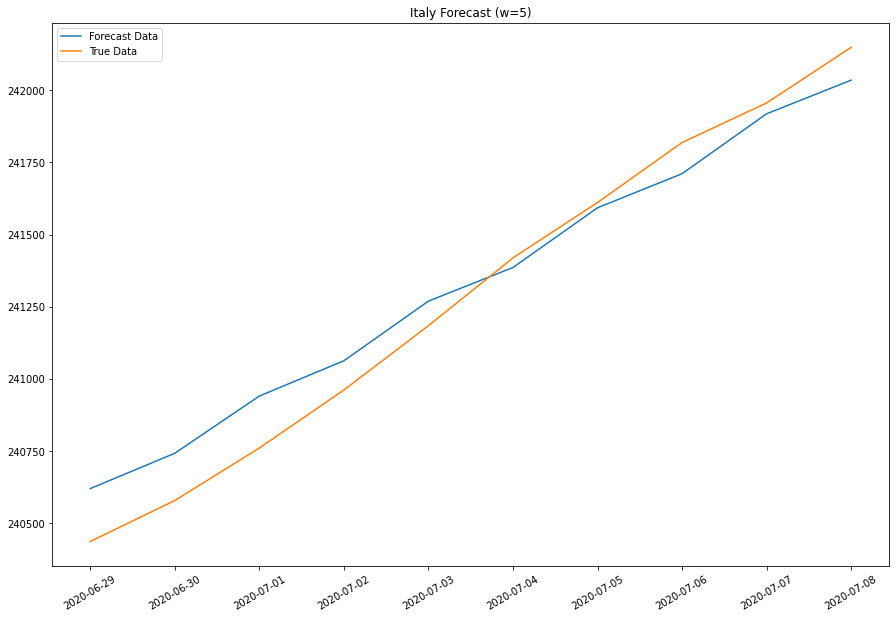

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(italyNN_forecast10_w5.iloc[1, -forecast_days:])
plt.plot(df_italy.iloc[0, -forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Forecast Data", "True Data"])
plt.title("Italy Forecast (w=5)")
plt.show()

In [ ]:
rmse = mean_squared_error(df_italy.iloc[0, -forecast_days:], italyNN_forecast10_w5.iloc[1, -forecast_days:] , squared=False)
print("RMSE of Canada NN 10 days forcasting: {}".format(rmse))

RMSE of Canada NN 10 days forcasting: 117.46745591116796


w = 5 is better

## LSTM

### World Class

In [ ]:
df_worldclass=worldclass_dataframe(df_conf_new)
df_worldclass=df_worldclass.iloc[:, :-12]

In [ ]:
forecast_days = 10
world_forecast10_w1=pd.read_csv("worldLSTM_forecast10_w1.csv")
world_forecast10_w1.columns = pd.to_datetime(world_forecast10_w1.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


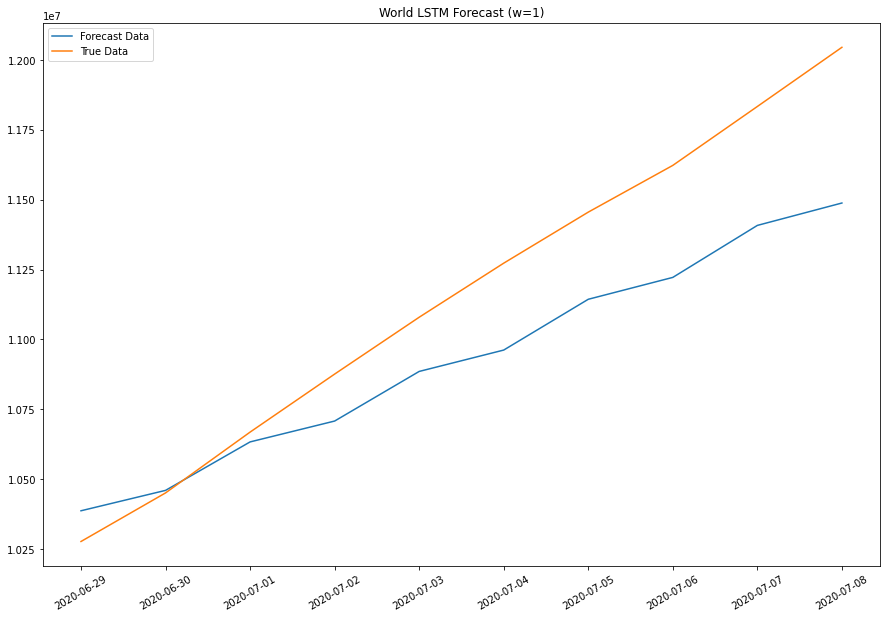

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(world_forecast10_w1.iloc[1, -forecast_days:])
plt.plot(df_worldclass.iloc[0, -forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Forecast Data", "True Data"])
plt.title("World LSTM Forecast (w=1)")
plt.show()

In [ ]:
rmse = mean_squared_error(df_worldclass.iloc[0, -forecast_days:], world_forecast10_w1.iloc[1, -forecast_days:] , squared=False)
print("RMSE of World LSTM 10 days forcasting: {}".format(rmse))

RMSE of World LSTM 10 days forcasting: 304322.49868765863


### China

In [ ]:
df_china, _, _ = sum_regioncase(df_conf_new, "China", region_level="county")
df_china=df_china.iloc[:, :-12]

In [ ]:
forecast_days = 10
chinaLSTM_forecast10_w1=pd.read_csv("chinaLSTM_forecast10_w1.csv")
chinaLSTM_forecast10_w1.columns = pd.to_datetime(chinaLSTM_forecast10_w1.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


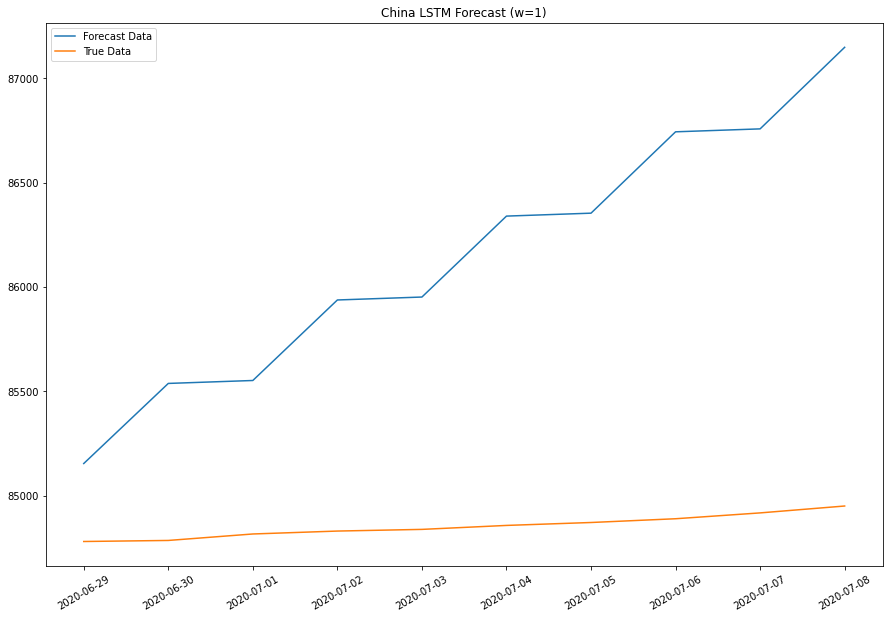

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(chinaLSTM_forecast10_w1.iloc[1, -forecast_days:])
plt.plot(df_china.iloc[0, -forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Forecast Data", "True Data"])
plt.title("China LSTM Forecast (w=1)")
plt.show()

In [ ]:
rmse = mean_squared_error(df_china.iloc[0, -forecast_days:], chinaLSTM_forecast10_w1.iloc[1, -forecast_days:] , squared=False)
print("RMSE of China LSTM 10 days forcasting: {}".format(rmse))

RMSE of China LSTM 10 days forcasting: 1405.6489924703674


In [ ]:
forecast_days = 10
chinaLSTM_forecast10_w3=pd.read_csv("chinaLSTM_forecast10_w3.csv")
chinaLSTM_forecast10_w3.columns = pd.to_datetime(chinaLSTM_forecast10_w3.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


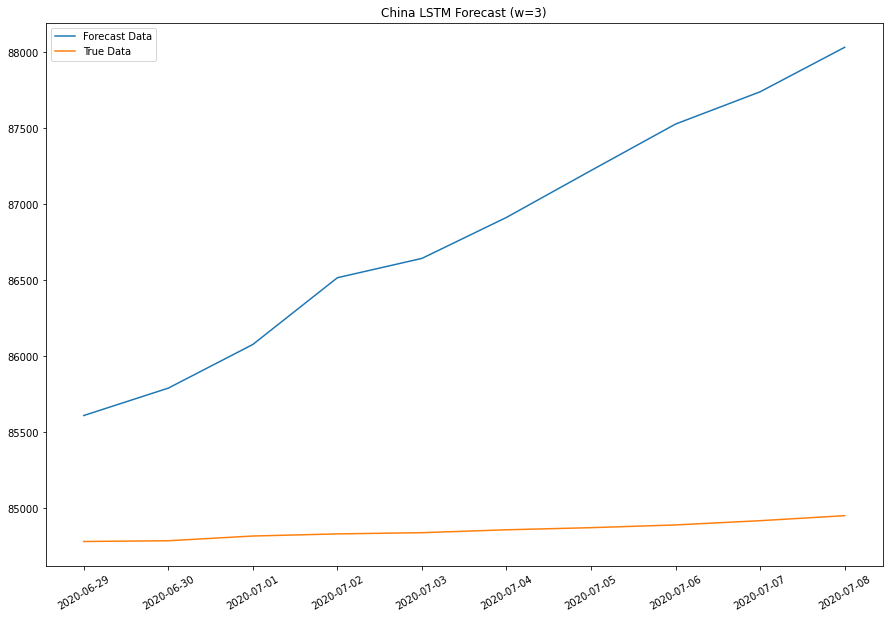

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(chinaLSTM_forecast10_w3.iloc[1, -forecast_days:])
plt.plot(df_china.iloc[0, -forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Forecast Data", "True Data"])
plt.title("China LSTM Forecast (w=3)")
plt.show()

In [ ]:
rmse = mean_squared_error(df_china.iloc[0, -forecast_days:], chinaLSTM_forecast10_w3.iloc[1, -forecast_days:] , squared=False)
print("RMSE of China LSTM 10 days forcasting: {}".format(rmse))

RMSE of China LSTM 10 days forcasting: 2088.2115190100403


w = 1 is better, outperforms NN (w=3)

### Canada

In [ ]:
df_canada, _, _ = sum_regioncase(df_conf_new, "Canada", region_level="county")
df_canada = df_canada.iloc[:, :-12]

In [ ]:
forecast_days = 10
canadaLSTM_forecast10_w1=pd.read_csv("canadaLSTM_forecast10_w1.csv")
canadaLSTM_forecast10_w1.columns = pd.to_datetime(canadaLSTM_forecast10_w1.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


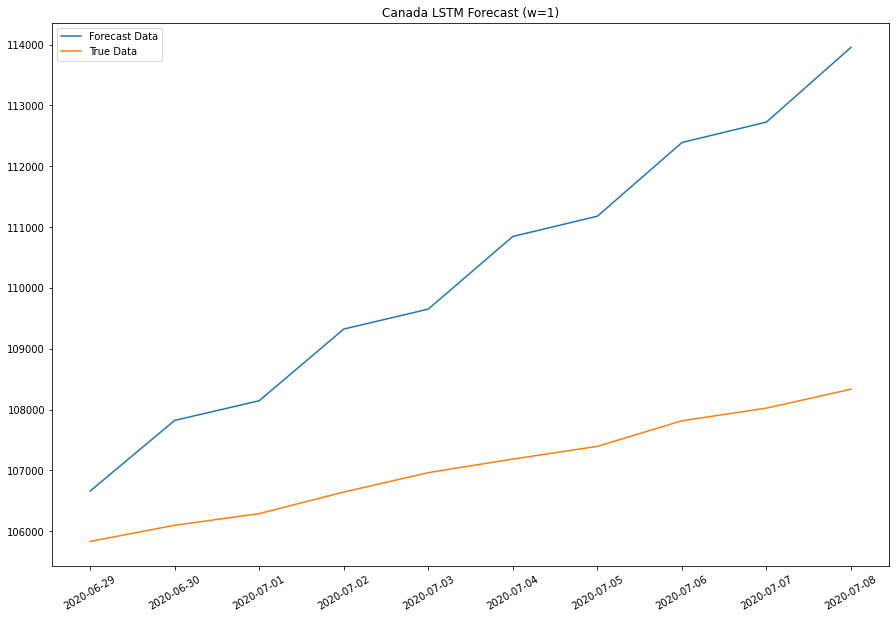

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(canadaLSTM_forecast10_w1.iloc[1, -forecast_days:])
plt.plot(df_canada.iloc[0, -forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Forecast Data", "True Data"])
plt.title("Canada LSTM Forecast (w=1)")
plt.show()

In [ ]:
rmse = mean_squared_error(df_canada.iloc[0, -forecast_days:], canadaLSTM_forecast10_w1.iloc[1, -forecast_days:] , squared=False)
print("RMSE of Canada LSTM 10 days forcasting: {}".format(rmse))

RMSE of Canada LSTM 10 days forcasting: 3519.4948425671387


In [ ]:
canadaLSTM_forecast10_w3=pd.read_csv("canadaLSTM_forecast10_w3.csv")
canadaLSTM_forecast10_w3.columns = pd.to_datetime(canadaLSTM_forecast10_w3.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


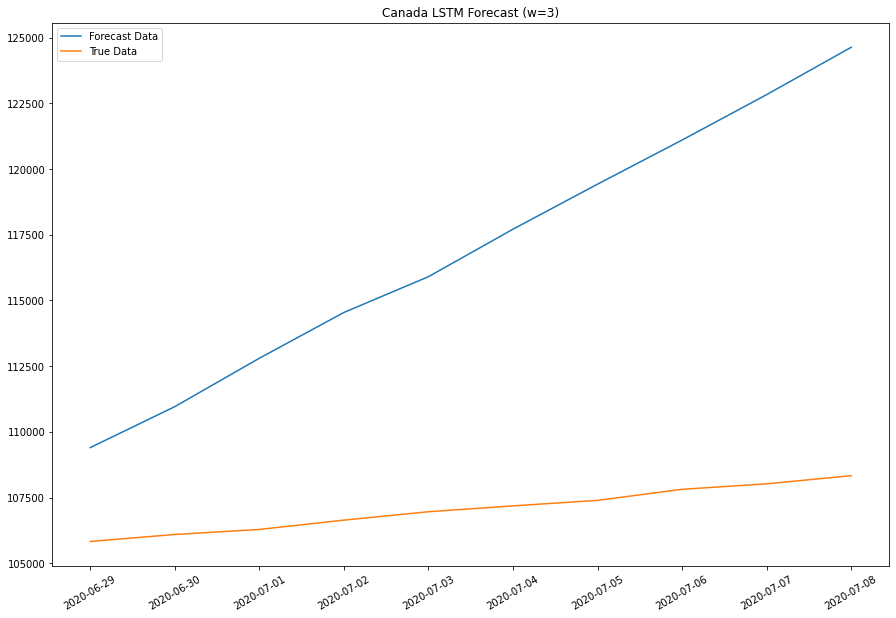

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(canadaLSTM_forecast10_w3.iloc[1, -forecast_days:])
plt.plot(df_canada.iloc[0, -forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Forecast Data", "True Data"])
plt.title("Canada LSTM Forecast (w=3)")
plt.show()

In [ ]:
rmse = mean_squared_error(df_canada.iloc[0, -forecast_days:], canadaNN_forecast10_w3.iloc[1, -forecast_days:] , squared=False)
print("RMSE of Canada LSTM 10 days forcasting: {}".format(rmse))

RMSE of Canada LSTM 10 days forcasting: 11803.207090654812


w = 1 is better, NN is better

### Italy

In [ ]:
df_italy, _, _ = sum_regioncase(df_conf_new, "Italy", region_level="county")
df_italy = df_italy.iloc[:, :-12]

In [ ]:
forecast_days = 10
italyLSTM_forecast10_w1=pd.read_csv("italyLSTM_forecast10_w1.csv")
italyLSTM_forecast10_w1.columns = pd.to_datetime(italyLSTM_forecast10_w1.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


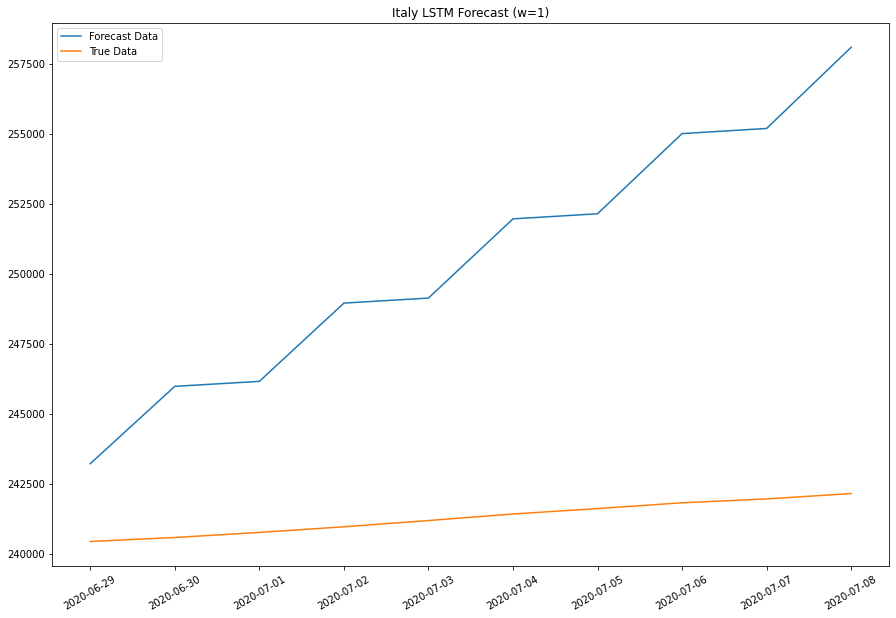

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(italyLSTM_forecast10_w1.iloc[1, -forecast_days:])
plt.plot(df_italy.iloc[0, -forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Forecast Data", "True Data"])
plt.title("Italy LSTM Forecast (w=1)")
plt.show()

In [ ]:
rmse = mean_squared_error(df_italy.iloc[0, -forecast_days:], italyLSTM_forecast10_w1.iloc[1, -forecast_days:] , squared=False)
print("RMSE of Canada NN 10 days forcasting: {}".format(rmse))

RMSE of Canada NN 10 days forcasting: 10089.766941632011


In [ ]:
italyLSTM_forecast10_w3=pd.read_csv("italyLSTM_forecast10_w3.csv")
italyLSTM_forecast10_w3.columns = pd.to_datetime(italyLSTM_forecast10_w3.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


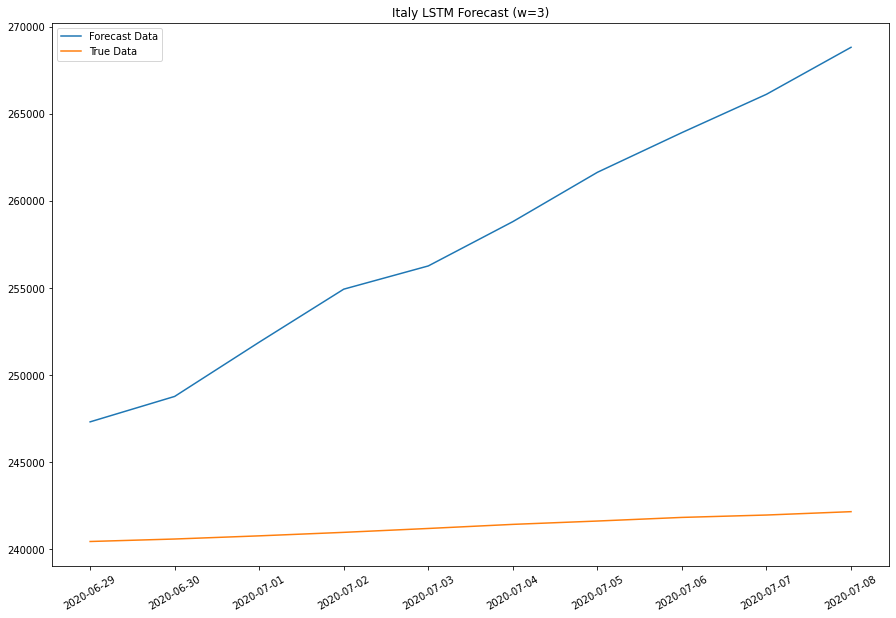

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(italyLSTM_forecast10_w3.iloc[1, -forecast_days:])
plt.plot(df_italy.iloc[0, -forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Forecast Data", "True Data"])
plt.title("Italy LSTM Forecast (w=3)")
plt.show()

In [ ]:
rmse = mean_squared_error(df_italy.iloc[0, -forecast_days:], italyLSTM_forecast10_w3.iloc[1, -forecast_days:] , squared=False)
print("RMSE of Canada LSTM 10 days forcasting: {}".format(rmse))

RMSE of Canada LSTM 10 days forcasting: 17741.04297922746


W = 1 is better, NN(w=5) is better